In [1]:
%config Completer.use_jedi = False

## Import von  Modulen


In [2]:
# Importiere Module und Methoden
#%matplotlib ipympl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

## Import der Daten

Die Daten und Merkmale wurden im ersten Teil des Projektes bearbeitet. Hier werden diese Daten aus lokal gespeicherten CSV-Dateien geladen:

In [3]:
#Read OHE Data shortcut
#waitOrBait_subset = load_data_set("~/ml/datasets/waitOrBait/fromCollab/transformedDF.csv")#isttransformedDf
train_set_orig = pd.read_csv("./train_set.csv")
train_set = pd.read_csv("./train_set_ohe.csv")
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83624 entries, 0 to 83623
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Departure_FRA                        83624 non-null  float64
 1   Departure_STN                        83624 non-null  float64
 2   Departure_SXF                        83624 non-null  float64
 3   Destination_FRA                      83624 non-null  float64
 4   Destination_STN                      83624 non-null  float64
 5   Destination_SXF                      83624 non-null  float64
 6   Price_Dev_Cat_Falling                83624 non-null  float64
 7   Price_Dev_Cat_Rising                 83624 non-null  float64
 8   Price_Dev_Cat_Steady                 83624 non-null  float64
 9   Request_Day                          83624 non-null  float64
 10  Flight_Day                           83624 non-null  float64
 11  buy                         

### Speichern der Merkmale im Dataframe - Erzeuge Trainings- und Testdatensatz mit train_test_split()

In [4]:
customFeaturesDf = train_set[["Departure_FRA", "Departure_STN", "Departure_SXF", "Destination_FRA", "Destination_STN", "Destination_SXF", "Price_Dev_Cat_Falling", 
                                  "Price_Dev_Cat_Rising", "Price_Dev_Cat_Steady", "Price_In_Eur",
                                  "Price_Dev", "Price_Dev_Three_Days", "Same_Day_Request_route_Flight_price",
                                  "Request_Month", "Request_Time", "Request_Day", "Flight_Day", "Departure_hour",
                                  "Hours_to_Flight", "Request_Count", "Request_Count_Sum", "Last_Request_Bool", "Is_Holiday_UK", "Is_Holiday_GER",
                                  "Is_School_Holiday_BER", "Is_School_Holiday_FRA", "Is_School_Holiday_UK", "buy"]]
customFeaturesDf.head()

,Departure_FRA,Departure_STN,Departure_SXF,Destination_FRA,Destination_STN,Destination_SXF,Price_Dev_Cat_Falling,Price_Dev_Cat_Rising,Price_Dev_Cat_Steady,Price_In_Eur,...,Hours_to_Flight,Request_Count,Request_Count_Sum,Last_Request_Bool,Is_Holiday_UK,Is_Holiday_GER,Is_School_Holiday_BER,Is_School_Holiday_FRA,Is_School_Holiday_UK,buy
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,208.07,...,56,1.0,4,0,0,0,1,0,0,1
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,259.07,...,44,2.0,4,0,0,0,1,0,0,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,259.07,...,32,3.0,4,0,0,0,1,0,0,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,259.07,...,20,4.0,4,1,0,0,1,0,0,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,143.86,...,58,1.0,4,0,0,0,1,0,0,1


In [5]:
X = customFeaturesDf.iloc[:,0:-1]
y = customFeaturesDf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y, shuffle=True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape, "\n")

Shape of X_train: (66899, 27)
Shape of X_test: (16725, 27)
Shape of y_train: (66899,)
Shape of y_test: (16725,) 



### Standardisierung der Variance auf 1 um Rauschen in den Datensatz zu veringern und die Skalierung der Dimensionen zu vereinheitlichen.

X_scale: Alle 21 Features

In [6]:
scaler = StandardScaler(with_mean=False)

# scale variance to 1
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
X_train_scaled.shape

(66899, 27)

## Hauptkomponentenanalyse (PCA): Reduzierung der Menge der Merkmale

Aufgrund der Erkenntnisse, die aus der PCA gewonnen wurden (siehe oben bei SVM), werden hier im weiteren die merkmalsreduzierten Trainingsdaten mit 18 Merkmalen genutzt.

(66899, 2)

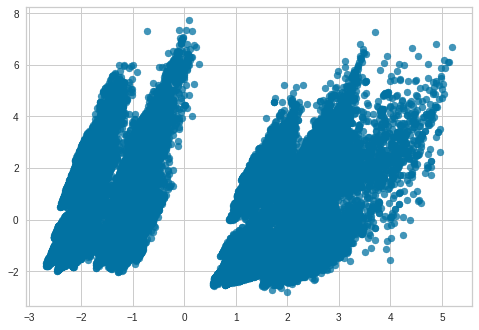

In [8]:
# reduced featured space to 18 with PCA
from yellowbrick.features import PCA

pca = PCA(n_components=0.95)
pca.fit(X_train_scaled) 
X_train_reduced = pca.transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)
X_train_reduced.shape

## Training des Classifiers mit PCA-reduziertem Merkmalssatz

In [9]:
# possible solvers are: 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'
logReg_clf = LogisticRegression(random_state=42, solver="lbfgs", max_iter=3000).fit(X_train_reduced, y_train)

scores = cross_val_score(logReg_clf, X_train_reduced, y_train, cv=10, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.00


## Optimierung der Hyperparameter

In [10]:
#LogREgression Optimierung des Hyperparameter
# Grid search cross validation

#Source: https://towardsdatascience.com/implement-logistic-regression-with-l2-regularization-from-scratch-in-python-20bd4ee88a59#4077
#penalty : None or 'l2', default='l2'.
#        Option to perform L2 regularization.
#    C : float, default=0.1
#        Inverse of regularization strength; must be a positive float. 
#        Smaller values specify stronger regularization.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = {'C': [0.00001, 0.0001, 0.001, 0.01,0.1, 1, 100, 10000, 100000, 1000000, 10000000, 100000000], "penalty":["l2"] }
#grid = {'C': [1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3], "penalty":["l2"] }

logReg_cv=GridSearchCV(logReg_clf,grid,cv=10)
logReg_cv.fit(X_train_reduced,y_train)

print("tuned hpyerparameters :(best parameters) ",logReg_cv.best_params_)
print("accuracy :",logReg_cv.best_score_)

print("Best parameters set found on X_train:")
print()
print(logReg_cv.best_params_)
print()
print("Grid scores on train_set:")
print()
means = logReg_cv.cv_results_['mean_test_score']
stds = logReg_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, logReg_cv.cv_results_['params']):
      print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
      
print("Confusion Matrix?:")

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.7761999431947818
Best parameters set found on X_train:

{'C': 0.001, 'penalty': 'l2'}

Grid scores on train_set:

0.776 (+/-0.000) for {'C': 1e-05, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 0.0001, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 0.001, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 0.01, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 0.1, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 1, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 100, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 10000, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 100000, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 1000000, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 10000000, 'penalty': 'l2'}
0.776 (+/-0.000) for {'C': 100000000, 'penalty': 'l2'}
Confusion Matrix?:


## Bewertung mit monetärem Maß

### Import der Methode und Datenaufbereitung

In [11]:
# The model quality evaluation function expects a Pandas dataframe with at least the following columns:
# Request_Date          int64
# flight_unique_id     object
# Price               float64
# buy                    bool

def model_quality_evaluation(df):
    # Make a copy of the provided dataframe as to not modify the original.
    df = df.copy()

    # Convert 'Price' to whole cents and store as integers to avoid floating point errors.
    df['Price'] = df['Price'] * 100
    df['Price'] = df['Price'].astype(int)

    # Initialize a variable that stores the sum of all our balances.
    sum_balances = 0

    # Get a list of all 'flight_unique_id'.
    flight_unique_ids = df['flight_unique_id'].unique()

    # Iterate over all 'flight_unique_id'.
    for flight_unique_id in flight_unique_ids:
        # Get a subset of the data for the specified 'flight_unique_id'.
        df_subset = df[df['flight_unique_id'] == flight_unique_id]

        # Get all request dates except for the latest request date before departure.
        # At the latest request date before departure we need to buy a ticket anyway,
        # so we don't care about this specific request date.
        request_dates = df_subset[df_subset['Request_Date'] != df_subset['Request_Date'].max()]

        # Make sure request dates are sorted in descending order.
        request_dates.sort_values(by='Request_Date', ascending=False, inplace=True)

        # Get the ticket price from the latest request date before departure,
        # because we certainly have to buy a ticket at this date.
        last_buying_price = df_subset[df_subset['Request_Date'] == df_subset['Request_Date'].max()]['Price'].values[0]

        # Iterate over the remaining request dates
        for _, row in request_dates.iterrows():
            # and check wether the model wants to buy a ticket at the specific request date.
            if(row['buy'] == 1):
                # If the model decides to buy a ticket the last buying price is set to the
                # price point of this request date and the balance doesn't change.
                last_buying_price = row['Price']
            else:
                # If the models decides to not buy a ticket the balance equals the
                # the current ticket price minus the last buying price.
                current_price = row['Price']
                balance = current_price - last_buying_price

                # The balance is added to the sum of all balances.
                sum_balances = sum_balances + balance

    # Return the sum of all our previously calculated balances.
    return sum_balances / 100

In [12]:
X = customFeaturesDf.iloc[:,0:-1]
y = customFeaturesDf.iloc[:,-1]
scaler = StandardScaler(with_mean=False)

# scale variance to 1
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

(83624, 2)

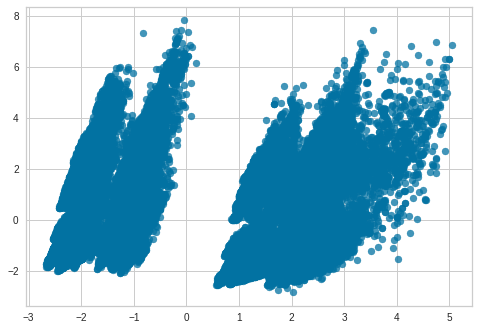

In [13]:
#Gesamten Daten auf PCA-18-Merkmale transformieren. Oben wurden nur TRainingsdaten transformiert (n=66.000)
pca2 = PCA(n_components=0.95)
pca2.fit(X_scaled)
X_reduced=pca2.transform(X_scaled)
X_reduced.shape

### Egentliche monetäre Bewertung

In [14]:
logReg_clf02 = LogisticRegression(random_state=42, solver="lbfgs", max_iter=3000).fit(X_reduced, y)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
money_scores = []

# for each fold create a dataframe
for train_index, test_index in skf.split(X_reduced, y): # split() return index of each fold
	# get each fold train, test fold with index index 
	x_train_fold, x_test_fold = X_reduced[train_index], X_reduced[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]
	logReg_clf02.fit(x_train_fold, y_train_fold)
	y_pred = logReg_clf02.predict(x_test_fold)
	
	# make test df to evaluate
	X_train_1 = train_set_orig.loc[test_index]
	df = pd.DataFrame(x_test_fold, index=test_index)
	df["buy"] = y_pred
	df["flight_unique_id"] = X_train_1["flight_unique_id"]
	df["Request_Date"] = X_train_1["Request_Date"]
	df["Price"] = X_train_1["Price_In_Eur"]
 
	# eval with custom func and append
	score = model_quality_evaluation(df)
	money_scores.append(score)


# Print the output.
print('List of possible money scores:', money_scores)
print('\nMean Money:',
	np.mean(money_scores))
print('\nStandard Deviation is:', np.std(money_scores))

/tmp/ipykernel_10270/4028796872.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  request_dates.sort_values(by='Request_Date', ascending=False, inplace=True)
/tmp/ipykernel_10270/4028796872.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  request_dates.sort_values(by='Request_Date', ascending=False, inplace=True)
/tmp/ipykernel_10270/4028796872.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  request_dates.sort_values(by='Re

List of possible money scores: [-753056.47, -791532.89, -813918.41, -818616.64, -803948.02]

Mean Money: -796214.486

Standard Deviation is: 23493.08265481618


## Verbesserung des Ergebnisses des monetären Maßes
### Verschiebung des Threshold (Grenzwert der Entscheidungsfunktion)
Def.: True Positive (TP-Werte) sind laut der Darstellung der Konfusionsmatrix in Python die korrekten 'Wait'-Modellentscheidungen. Demnach ergeben sich:
- TP ... korrekte 'Wait'-Entscheidungen,
- TN ... korrekte 'bait'-Entscheidungen,
- FP ... falsche 'Wait'-Entscheidungen, d.h. es hätte gekauft werden müssen
- FN ... falsche 'bait'-Entscheidungen, d.h. man hätte noch warten sollen.
    
Das monetäre Gütemaß begünstigt falsche 'Bait' - Entscheidungen, weil hierbei keine negativen Kostenwerte entstehen. Durch -im Zweifel- falsche Kaufempfehlungen lassen sich also Verluste vermeiden.

Hingegen führen falsche 'Wait'-Entscheidungen immer zu Verlusten. Ziel muss es also sein, möglichst keine falschen 'Wait'-Entscheidungen zu erhalten. Sollte hingegen eine falsche 'Bait'-Empfehlung ausgesprochen werden, so verursacht dies keine Kosten. Falsche 'Wait'-Entscheidungen (FN) mmüssen minimiert werden. Wir versuchen also, ein möglichst hohen Recall (TP/(TP+FN))zu erzielen. Dies kann durch ein Verschieben des Threshold-Wertes erreicht werden.

### Precission-Recall-Kurve

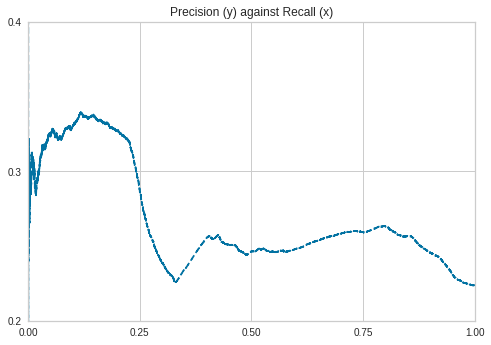

In [15]:
#CM-Vorbereitung: Vorhersage der Ergebnisse
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

y_train_pred_PR_Curve = cross_val_predict(logReg_clf02, X_reduced, y, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y, y_train_pred_PR_Curve)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


ax.set(xlim=(0, 1), xticks=(0, 0.25,0.5, 0.75,1),
       ylim=(0.2, 0.4), yticks=(0.2, 0.3, 0.4))

ax.plot(recalls[:-1], precisions[:-1], "b--", label="y-Precisions")
ax.set_title('Precision (y) against Recall (x)')
plt.show()



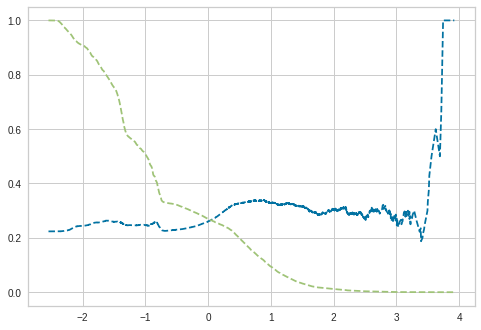

In [16]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recalls")
 #   plt.axvline(x=-2165, ymin=0.01, color='red', linewidth=1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### Einen konkreten Grenzwert erreichen

Um z.B. einen 95%-igen Recall zu erreichen,

    Ziel: R=>95%

muss ein passender Grenzwert der Entscheidungsfunktion gewählt werden. Konkret wird nach dem niedrigsten Grenzwert ('threshold', mit der Methode np.argmax()) gesucht, der eine 95%ige Recall garantiert:


In [22]:
# argmin() ... returns the indices of the minimum value along an axis.

threshold_95_recall = thresholds[np.argmin(recalls >= 0.997)] 
print("Grenzwert, ab dem in -wait- klassifiziert wird....\n",threshold_95_recall)

Grenzwert, ab dem in -wait- klassifiziert wird....
 -2.3818619657861557


Um mit diesem Grenzwert Vorhersagen (zunächst nur) auf dem Trainingsset zu treffen, kann auch -anstelle des Classifiers- die *predict()*-Methode gewählt werden:

In [18]:
# y_scores sind die alle Ergebniswerte der Entscheidungsfunktion für jeden DS, hier nur für alle Werte,
# die über dem gewünschten Grenzwert liegen
#D.h. das sind die Labelwerte, mit denen eine Precision von 90% erreicht wird
print("Y-scores sind...", y_train_pred_PR_Curve)
y_train_pred_95 = (y_train_pred_PR_Curve >= threshold_95_recall)
print("Anzahl der Y-Scores...",len(y_train_pred_95))
y_train_pred_95

Y-scores sind... [ 1.98866657  2.47098542  2.18672854 ... -1.38758421 -1.58913916
 -1.27726853]
Anzahl der Y-Scores... 83624


array([ True,  True,  True, ...,  True,  True,  True])

In [19]:
#precision_score, recall_score
from sklearn.metrics import precision_score, recall_score

print("Recall is ...",recall_score(y, y_train_pred_95))
print("Precision is ...", precision_score(y, y_train_pred_95))


Recall is ... 0.9969548028635538
Precision is ... 0.22371007960103578


In [20]:
#CM
from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_train_pred_95)

array([[  151, 64755],
       [   57, 18661]])

## Erneute Bewertung: Monetäres Maß mit neuem Threshold

In [21]:
logReg_clf03 = LogisticRegression(random_state=42, solver="lbfgs", max_iter=3000).fit(X_reduced, y_train_pred_95)


# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
money_scores = []

# for each fold create a dataframe
for train_index, test_index in skf.split(X_reduced, y_train_pred_95): # hier neue Vorhersagen einfügen
	# get each fold train, test fold with index index 
	x_train_fold, x_test_fold = X_reduced[train_index], X_reduced[test_index]
	y_train_fold, y_test_fold = y_train_pred_95[train_index], y_train_pred_95[test_index]
	logReg_clf03.fit(x_train_fold, y_train_fold)
	y_pred = logReg_clf03.predict(x_test_fold)
	
	# make test df to evaluate
	X_train_1 = train_set_orig.loc[test_index]
	df = pd.DataFrame(x_test_fold, index=test_index)
	df["buy"] = y_pred
	df["flight_unique_id"] = X_train_1["flight_unique_id"]
	df["Request_Date"] = X_train_1["Request_Date"]
	df["Price"] = X_train_1["Price_In_Eur"]
 
	# eval with custom func and append
	score = model_quality_evaluation(df)
	money_scores.append(score)


# Print the output.
print('List of possible money scores:', money_scores)
print('\nMean Money:',
	np.mean(money_scores))
print('\nStandard Deviation is:', np.std(money_scores))

/tmp/ipykernel_10270/4028796872.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  request_dates.sort_values(by='Request_Date', ascending=False, inplace=True)
/tmp/ipykernel_10270/4028796872.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  request_dates.sort_values(by='Request_Date', ascending=False, inplace=True)
/tmp/ipykernel_10270/4028796872.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  request_dates.sort_values(by='Re

List of possible money scores: [6.42, -9.17, 17.86, 51.65, -66.61]

Mean Money: 0.029999999999998295

Standard Deviation is: 38.855874716701464
